In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DEV_SAMPLE.csv')
df.head()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C16505,0,41,M,91519.92,SELF-EMP,38,41-45,926,15
1,C17241,0,52,M,117288.96,SAL,17,>50,768,13
2,C18802,0,31,F,259827.44,SENP,8,31-35,816,5
3,C19289,0,45,F,26677.55,PROF,14,41-45,353,18
4,C14028,0,39,F,43440.31,SENP,1,36-40,751,31


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 10 columns):
Cust_ID           14000 non-null object
Target            14000 non-null int64
Age               14000 non-null int64
Gender            14000 non-null object
Balance           14000 non-null float64
Occupation        14000 non-null object
No_OF_CR_TXNS     14000 non-null int64
AGE_BKT           14000 non-null object
SCR               14000 non-null int64
Holding_Period    14000 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.1+ MB


In [4]:
df.describe()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period
count,14000.000000,14000.000000,1.400000e+04,14000.000000,14000.000000,14000.000000
mean,0.088214,38.466643,1.449873e+05,16.795929,556.278500,15.270571
std,0.283616,9.537076,1.692614e+05,13.017563,261.464332,8.967025
min,0.000000,21.000000,0.000000e+00,0.000000,100.000000,1.000000
25%,0.000000,30.000000,2.372943e+04,7.000000,330.000000,7.000000
50%,0.000000,38.000000,7.905920e+04,14.000000,559.000000,16.000000
75%,0.000000,46.250000,2.132250e+05,22.000000,785.250000,23.000000
max,1.000000,55.000000,1.246967e+06,50.000000,999.000000,31.000000


In [5]:
df.shape

(14000, 10)

In [6]:
df.isnull().sum()

Cust_ID           0
Target            0
Age               0
Gender            0
Balance           0
Occupation        0
No_OF_CR_TXNS     0
AGE_BKT           0
SCR               0
Holding_Period    0
dtype: int64

In [7]:
df.isnull().sum(axis=1).any()

False

In [8]:
df.describe()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period
count,14000.000000,14000.000000,1.400000e+04,14000.000000,14000.000000,14000.000000
mean,0.088214,38.466643,1.449873e+05,16.795929,556.278500,15.270571
std,0.283616,9.537076,1.692614e+05,13.017563,261.464332,8.967025
min,0.000000,21.000000,0.000000e+00,0.000000,100.000000,1.000000
25%,0.000000,30.000000,2.372943e+04,7.000000,330.000000,7.000000
50%,0.000000,38.000000,7.905920e+04,14.000000,559.000000,16.000000
75%,0.000000,46.250000,2.132250e+05,22.000000,785.250000,23.000000
max,1.000000,55.000000,1.246967e+06,50.000000,999.000000,31.000000


In [9]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,Cust_ID,Gender,Occupation,AGE_BKT
0,C16505,M,SELF-EMP,41-45
1,C17241,M,SAL,>50
2,C18802,F,SENP,31-35
3,C19289,F,PROF,41-45
4,C14028,F,SENP,36-40


In [10]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Cust_ID,Gender,Occupation,AGE_BKT
0,5090,1,2,3
1,5648,1,1,6
2,6871,0,3,1
3,7251,0,0,3
4,3154,0,3,2


In [11]:
df_categorical.tail()

,Cust_ID,Gender,Occupation,AGE_BKT
13995,7304,0,2,6
13996,8432,1,3,0
13997,9735,0,3,0
13998,12860,1,3,2
13999,3715,0,3,5


In [12]:
df = df.drop(df_categorical.columns, axis=1)
df.head()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period
0,0,41,91519.92,38,926,15
1,0,52,117288.96,17,768,13
2,0,31,259827.44,8,816,5
3,0,45,26677.55,14,353,18
4,0,39,43440.31,1,751,31


In [13]:
df.describe()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period
count,14000.000000,14000.000000,1.400000e+04,14000.000000,14000.000000,14000.000000
mean,0.088214,38.466643,1.449873e+05,16.795929,556.278500,15.270571
std,0.283616,9.537076,1.692614e+05,13.017563,261.464332,8.967025
min,0.000000,21.000000,0.000000e+00,0.000000,100.000000,1.000000
25%,0.000000,30.000000,2.372943e+04,7.000000,330.000000,7.000000
50%,0.000000,38.000000,7.905920e+04,14.000000,559.000000,16.000000
75%,0.000000,46.250000,2.132250e+05,22.000000,785.250000,23.000000
max,1.000000,55.000000,1.246967e+06,50.000000,999.000000,31.000000


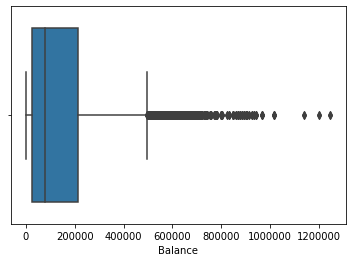

In [14]:
sns.boxplot(df.Balance)

In [15]:
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))

df1 = df.apply(normalize)

In [16]:
df1.describe()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,0.088214,0.513725,0.116272,0.335919,0.507540,0.475686
std,0.283616,0.280502,0.135739,0.260351,0.290839,0.298901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.264706,0.019030,0.140000,0.255840,0.200000
50%,0.000000,0.500000,0.063401,0.280000,0.510567,0.500000
75%,0.000000,0.742647,0.170995,0.440000,0.762236,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df = pd.concat([df, df_categorical], axis=1)
df.head()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Cust_ID,Gender,Occupation,AGE_BKT
0,0,41,91519.92,38,926,15,5090,1,2,3
1,0,52,117288.96,17,768,13,5648,1,1,6
2,0,31,259827.44,8,816,5,6871,0,3,1
3,0,45,26677.55,14,353,18,7251,0,0,3
4,0,39,43440.31,1,751,31,3154,0,3,2


In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(['Target'],axis=1)

y = df['Target']

In [22]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [23]:
X_train.head()

,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Cust_ID,Gender,Occupation,AGE_BKT
7479,32,17031.76,2,612,2,8121,1,1,1
11394,42,200530.10,5,896,10,6335,1,0,3
5717,34,382190.75,19,468,4,5902,1,0,1
2697,28,27478.54,42,576,22,889,1,1,0
4103,55,36307.18,10,851,2,9547,0,2,6


In [24]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      3797
           1       0.68      0.21      0.32       403

    accuracy                           0.91      4200
   macro avg       0.80      0.60      0.64      4200
weighted avg       0.90      0.91      0.89      4200



In [26]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[3757   40]
 [ 319   84]]
0.9145238095238095


In [30]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot, graphviz

# Putting features
features = list(df.columns[1:])
features

['Age',
 'Balance',
 'No_OF_CR_TXNS',
 'SCR',
 'Holding_Period',
 'Cust_ID',
 'Gender',
 'Occupation',
 'AGE_BKT']

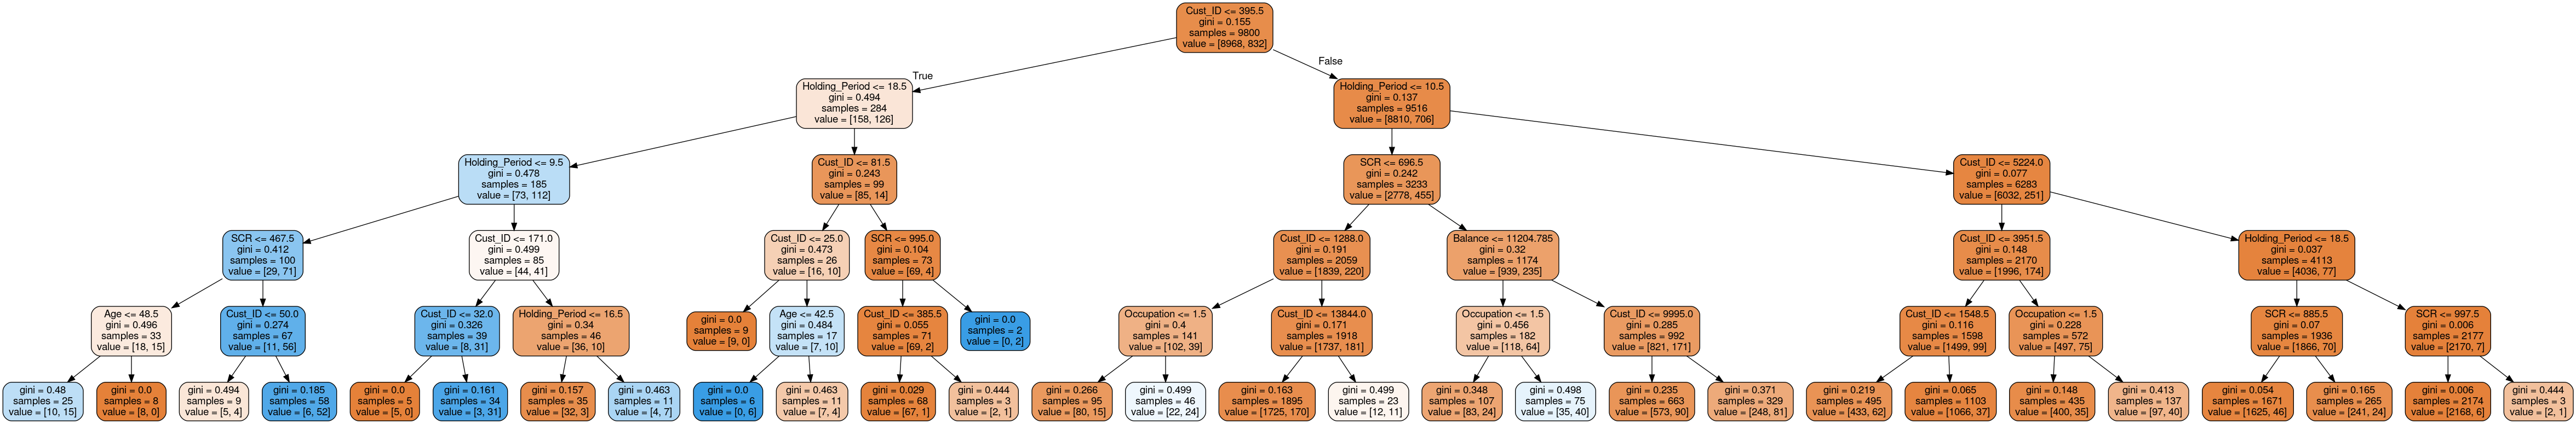

In [33]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [34]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=

In [35]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011695,0.002050,0.002803,0.000969,1,{'max_depth': 1},0.914839,0.914839,0.915306,0.915263,0.915263,0.915102,0.000215,8
1,0.014679,0.001476,0.001864,0.000054,2,{'max_depth': 2},0.922489,0.917899,0.918367,0.916284,0.917815,0.918571,0.002081,3
2,0.018936,0.000046,0.001884,0.000131,3,{'max_depth': 3},0.917899,0.917899,0.917857,0.916284,0.913731,0.916735,0.001624,6
3,0.023914,0.000382,0.001885,0.000058,4,{'max_depth': 4},0.919429,0.920959,0.918878,0.918326,0.916284,0.918776,0.001524,2
4,0.028536,0.000129,0.001915,0.000050,5,{'max_depth': 5},0.924528,0.920449,0.919898,0.916794,0.914242,0.919184,0.003487,1


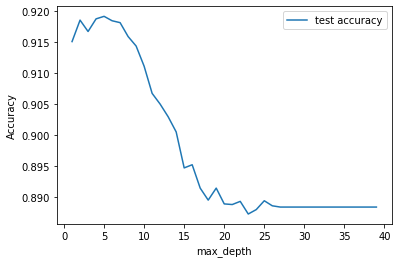

In [36]:
# plotting accuracies with max_depth
plt.figure()
#plt.plot(scores["param_max_depth"],   #ignore this line if error
 #        scores["mean_train_score"], 
  #       label="training accuracy")
plt.plot(scores["param_max_depth"], # excute only this if error
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [37]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fal

In [38]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.061828,0.013355,0.002674,0.001027,5,{'min_samples_leaf': 5},0.904131,0.914329,0.895918,0.900970,0.907095,0.904490,0.006159,10
1,0.046612,0.001172,0.002049,0.000049,25,{'min_samples_leaf': 25},0.917389,0.918409,0.916327,0.919347,0.916284,0.917551,0.001191,3
2,0.043516,0.002060,0.002049,0.000049,45,{'min_samples_leaf': 45},0.921469,0.918919,0.917857,0.917305,0.913221,0.917755,0.002680,2
3,0.040902,0.000710,0.002020,0.000045,65,{'min_samples_leaf': 65},0.921469,0.919939,0.917857,0.916284,0.913731,0.917857,0.002716,1
4,0.039277,0.000211,0.002603,0.001138,85,{'min_samples_leaf': 85},0.918409,0.916879,0.918367,0.916284,0.917815,0.917551,0.000840,3


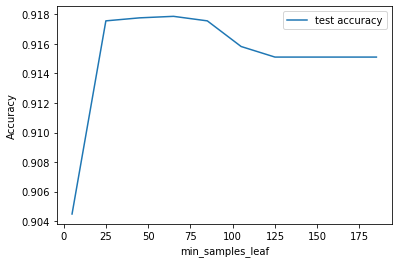

In [39]:
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [40]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fa

In [41]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062074,0.004790,0.002287,0.000254,5,{'min_samples_split': 5},0.895971,0.905150,0.888776,0.889740,0.887698,0.893469,0.006512,10
1,0.055966,0.002112,0.002110,0.000044,25,{'min_samples_split': 25},0.904131,0.907700,0.902041,0.894334,0.903522,0.902347,0.004416,9
2,0.054003,0.001704,0.002048,0.000042,45,{'min_samples_split': 45},0.913819,0.911270,0.907653,0.904543,0.910158,0.909490,0.003169,8
3,0.053582,0.002579,0.002523,0.000618,65,{'min_samples_split': 65},0.915349,0.909740,0.911735,0.905054,0.915263,0.911429,0.003838,7
4,0.061205,0.000961,0.002404,0.000415,85,{'min_samples_split': 85},0.916369,0.914839,0.913776,0.906585,0.914242,0.913163,0.003402,6


In [42]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [45]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048764,0.008378,0.002718,0.000675,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.922489,0.915859,0.913265,0.917815,0.914242,0.916735,0.003265,11
1,0.039916,0.001362,0.002232,0.000541,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.922489,0.915859,0.913265,0.917815,0.914242,0.916735,0.003265,11
2,0.037687,0.001043,0.001986,0.000082,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.915349,0.917899,0.916327,0.914242,0.917305,0.916224,0.001317,13
3,0.037171,0.000234,0.001898,0.000026,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.915349,0.917899,0.916327,0.914242,0.917305,0.916224,0.001317,13
4,0.054877,0.001582,0.002028,0.000050,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.922489,0.915859,0.912755,0.921899,0.914242,0.917449,0.004001,5
5,0.056986,0.002481,0.002182,0.000099,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.922489,0.915859,0.912755,0.921899,0.914242,0.917449,0.004001,5
6,0.049468,0.000723,0.002642,0.001145,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.915349,0.917899,0.916327,0.914242,0.917305,0.916224,0.001317,13
7,0.047792,0.000514,0.001977,0.000041,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.915349,0.917899,0.916327,0.914242,0.917305,0.916224,0.001317,13
8,0.028030,0.000063,0.001881,0.000011,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.921469,0.920959,0.917857,0.916284,0.913731,0.918061,0.002897,1
9,0.028533,0.000628,0.001944,0.000059,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.921469,0.920959,0.917857,0.916284,0.913731,0.918061,0.002897,1


In [46]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9180612244897959
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [47]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                   max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9123809523809524

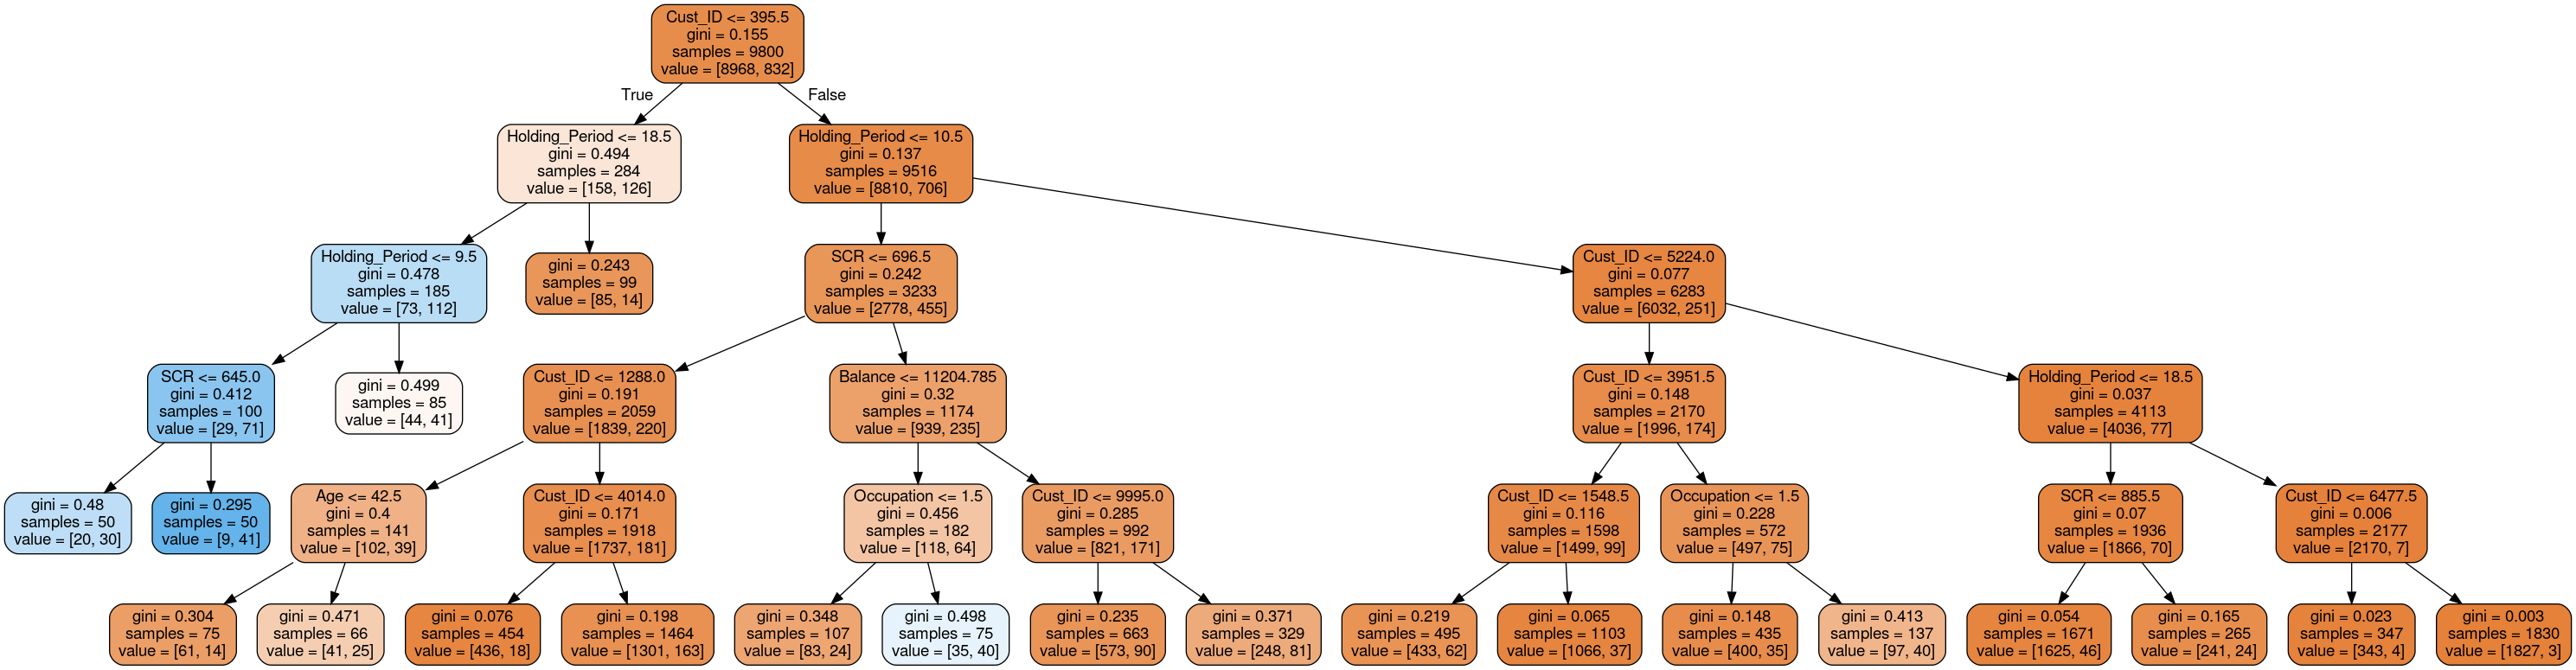

In [49]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [50]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.9111904761904762


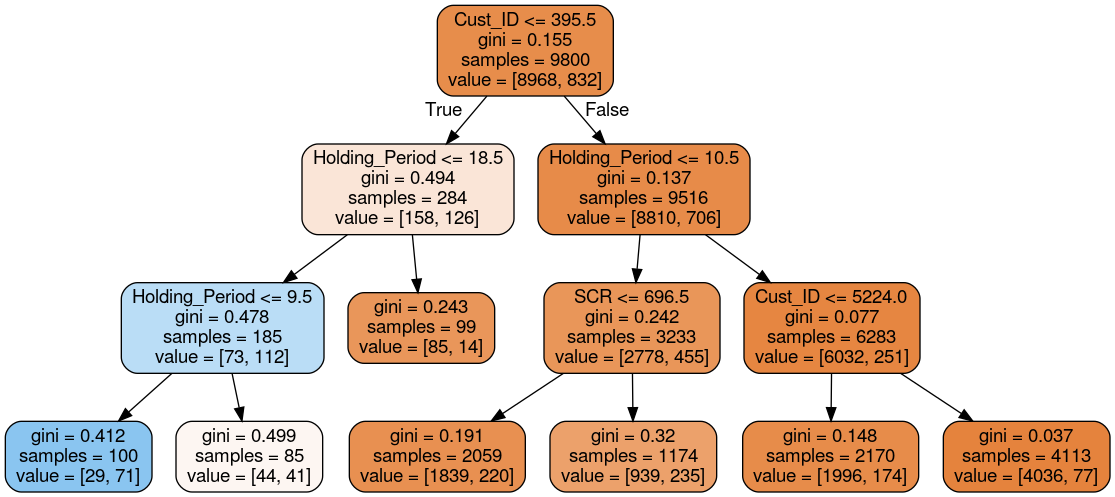

In [51]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [52]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3797
           1       0.84      0.09      0.17       403

    accuracy                           0.91      4200
   macro avg       0.88      0.54      0.56      4200
weighted avg       0.91      0.91      0.88      4200



In [53]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[3790    7]
 [ 366   37]]
